<a href="https://colab.research.google.com/github/salma-s0liman/Data-Mining/blob/main/Heart_Attack_DM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
sns.set_style('dark')
from scipy.cluster.hierarchy import dendrogram ,linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import math

In [ ]:
data=pd.read_csv('heart_attack.csv')
data.head(10)

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0
5,ZOO7941,54,Female,297,172/86,48,1,1,1,0,...,7.798752,241339,20.146839,795,5,10,Germany,Europe,Northern Hemisphere,1
6,WYV0966,90,Male,358,102/73,84,0,0,1,0,...,0.627356,190450,28.885811,284,4,10,Canada,North America,Northern Hemisphere,1
7,XXM0972,84,Male,220,131/68,107,0,0,1,1,...,10.543780,122093,22.221862,370,6,7,Japan,Asia,Northern Hemisphere,1
8,XCQ5937,20,Male,145,144/105,68,1,0,1,1,...,11.348787,25086,35.809901,790,7,4,Brazil,South America,Southern Hemisphere,0
9,FTJ5456,43,Female,248,160/70,55,0,1,1,1,...,4.055115,209703,22.558917,232,7,7,Japan,Asia,Northern Hemisphere,0


In [3]:
print(data.columns)

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [ ]:
null_values = data.isnull().sum()
print("Null values:")
print(null_values)
duplicate_rows = data[data.duplicated()]
print("\nDuplicate rows:")
print(duplicate_rows)

Null values:
Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

Duplicate r

**Change Binary to Boolean**

In [6]:
binar_to_text = {1: "Yes", 0: "No"}

for col in ['Diabetes', 'Family History', 'Smoking', 'Obesity',
            'Previous Heart Problems', 'Medication Use',
            'Physical Activity Days Per Week', 'Heart Attack Risk' , 'Alcohol Consumption']:
  data[col] = data[col].replace(binar_to_text)

In [7]:
data.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,No,No,Yes,No,...,6.615001,261404,31.251233,286,No,6,Argentina,South America,Southern Hemisphere,No
1,CZE1114,21,Male,389,165/93,98,Yes,Yes,Yes,Yes,...,4.963459,285768,27.194973,235,Yes,7,Canada,North America,Northern Hemisphere,No
2,BNI9906,21,Female,324,174/99,72,Yes,No,No,No,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,No
3,JLN3497,84,Male,383,163/100,73,Yes,Yes,Yes,No,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,No
4,GFO8847,66,Male,318,91/88,93,Yes,Yes,Yes,Yes,...,1.514821,160555,21.809144,231,Yes,5,Thailand,Asia,Northern Hemisphere,No


**OUTLIERS:**

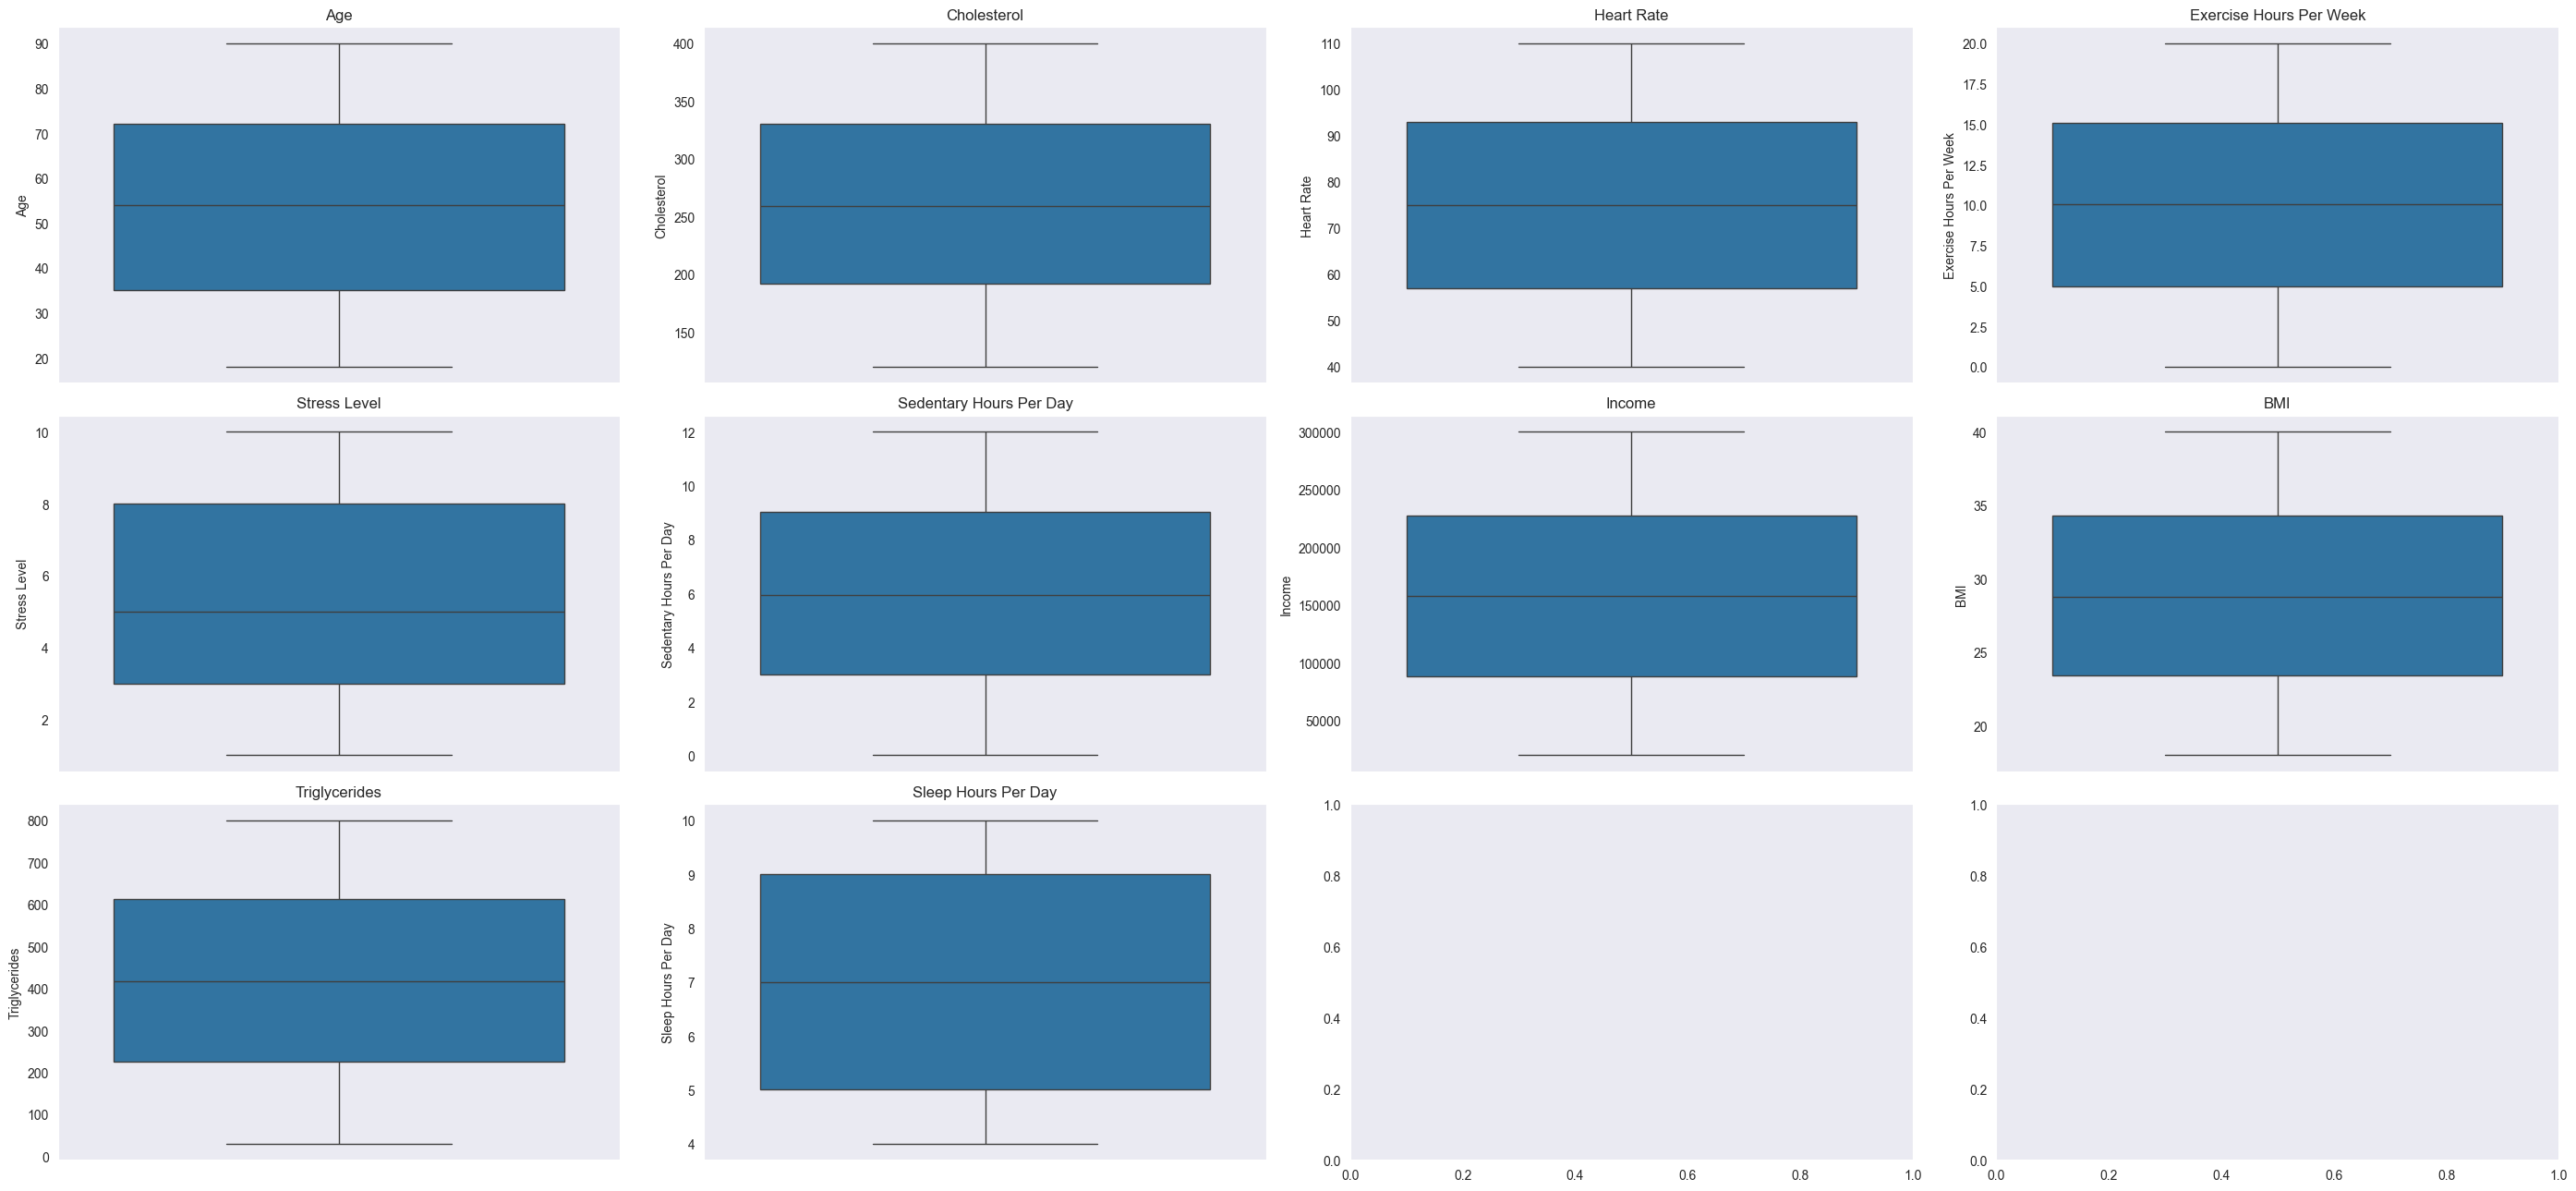

In [ ]:
num_cols = [col for col in data.columns if data[col].dtype != 'object']
cols = 4
rows = math.ceil(len(num_cols) / cols)
fig, axs = plt.subplots(rows, cols, figsize=(28, 13))
axs = axs.flatten()
for i, col in enumerate(num_cols):
    sns.boxplot(data=data[col], ax=axs[i])
    axs[i].set_title(f'{col}')
plt.tight_layout()
plt.show()


# Visualization

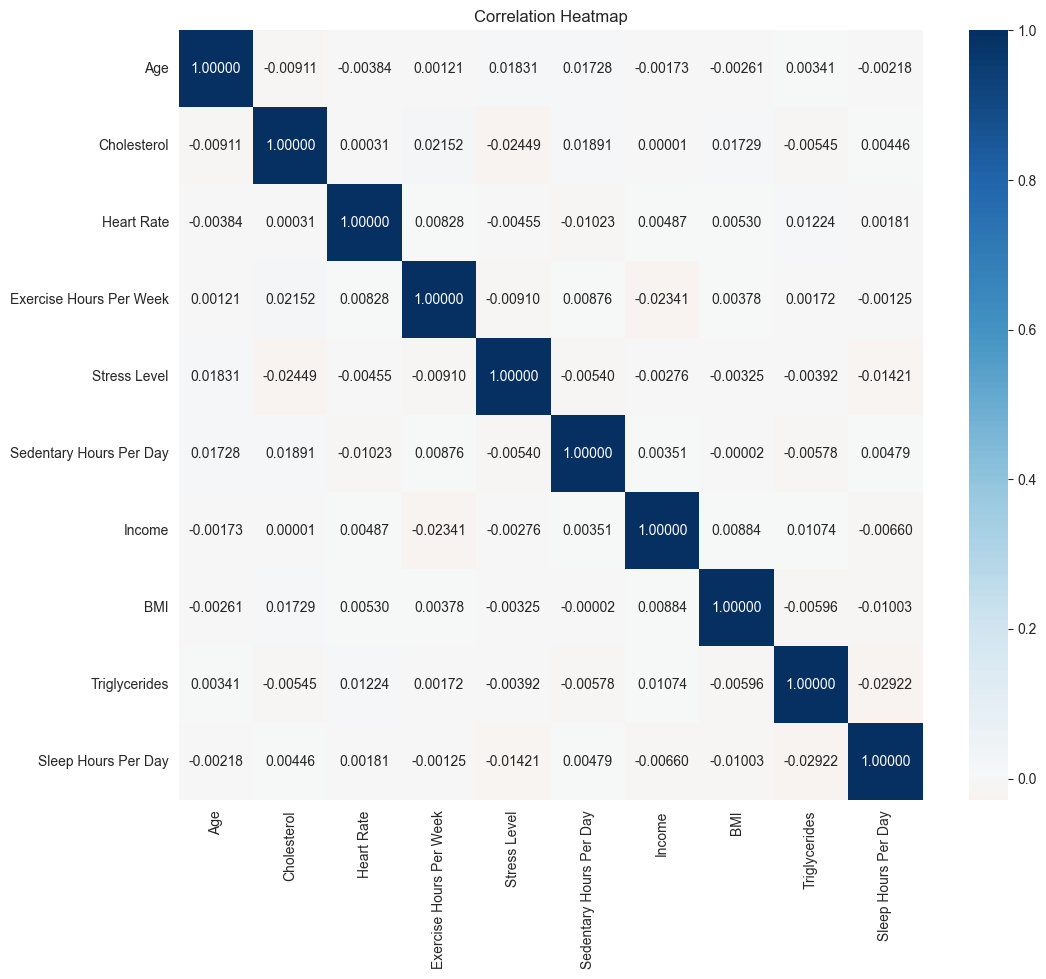

In [9]:
numeric_data = data.select_dtypes(include='number')

corr_matrix = numeric_data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu', fmt=".5f", center=0)
plt.title('Correlation Heatmap')
plt.show()

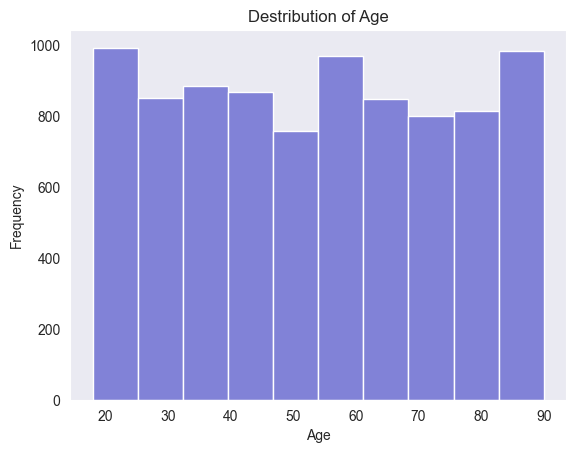

In [10]:
sns.histplot(data['Age'],color='#5e60ce',bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Destribution of Age')
sns.set_style("whitegrid")
plt.show()

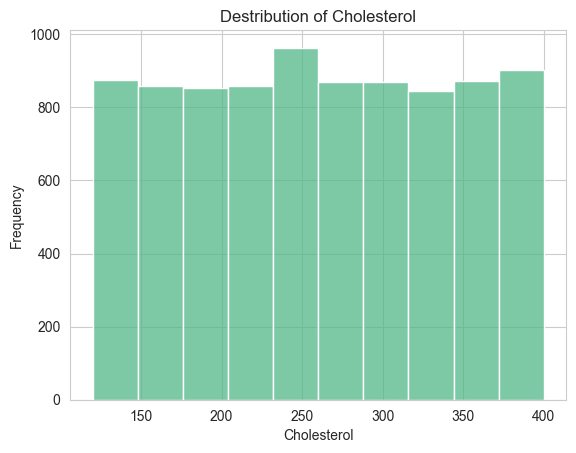

In [11]:
sns.histplot(data['Cholesterol'],color='#52b788',bins=10)
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
plt.title('Destribution of Cholesterol')
sns.set_style("whitegrid")
plt.show()

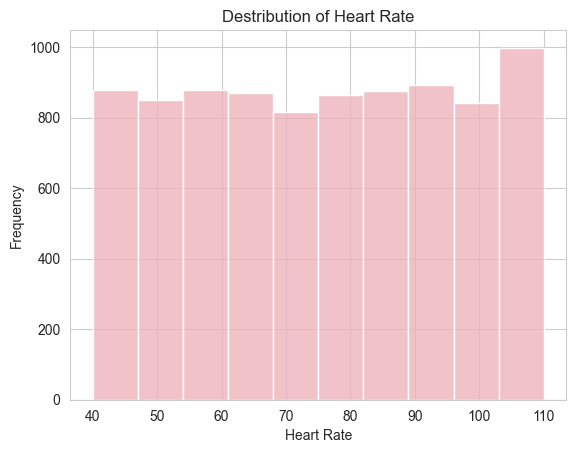

In [12]:
sns.histplot(data['Heart Rate'],color='#edafb8', bins=10)
plt.xlabel('Heart Rate')
plt.ylabel('Frequency')
plt.title('Destribution of Heart Rate')
sns.set_style("whitegrid")
plt.show()


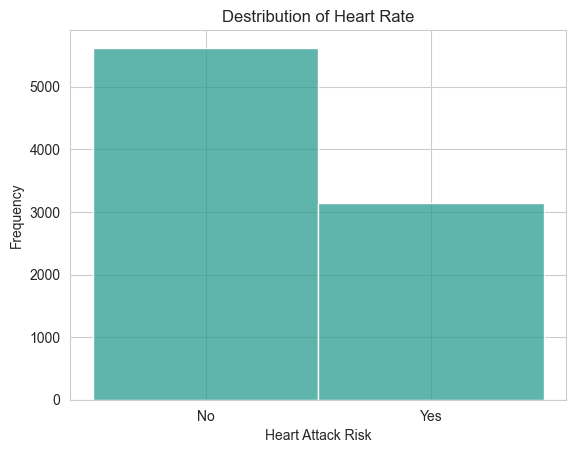

In [13]:
sns.histplot(data['Heart Attack Risk'],color='#2a9d8f', bins=10)
plt.xlabel('Heart Attack Risk')
plt.ylabel('Frequency')
plt.title('Destribution of Heart Rate')
sns.set_style("whitegrid")
plt.show()


Text(0.5, 1.0, 'Gender Distribution')

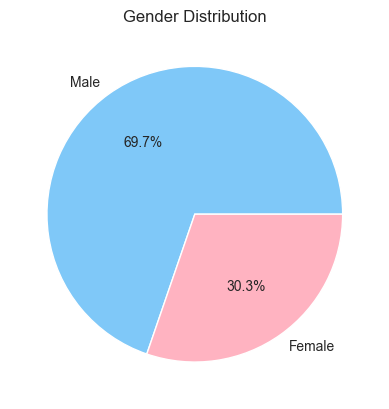

In [14]:
# Calculate sizes of males and females
gender_counts = data['Sex'].value_counts()
sizes = gender_counts.values
labels = gender_counts.index
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['#7fc8f8','#ffb3c1'])
plt.title('Gender Distribution')

Text(0.5, 1.0, 'Diabetes Distribution')

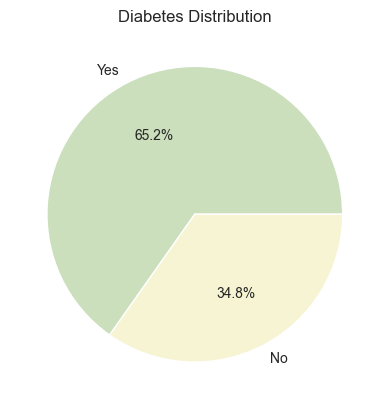

In [15]:
Diabetes_counts = data['Diabetes'].value_counts()
sizes = Diabetes_counts.values
labels = Diabetes_counts.index
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['#cbdfbd','#f6f4d2'])
plt.title('Diabetes Distribution')

Text(0.5, 1.0, 'Smoking Distribution')

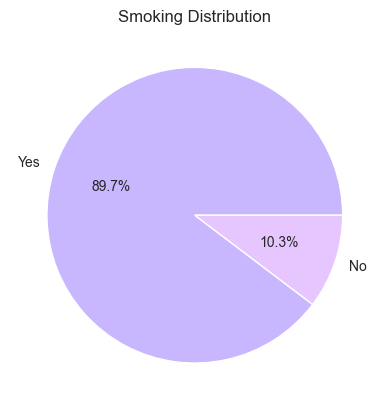

In [16]:
Smoking_counts = data['Smoking'].value_counts()
sizes = Smoking_counts.values
labels = Smoking_counts.index
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['#c8b6ff','#e7c6ff'])
plt.title('Smoking Distribution')


[1786, 1353]


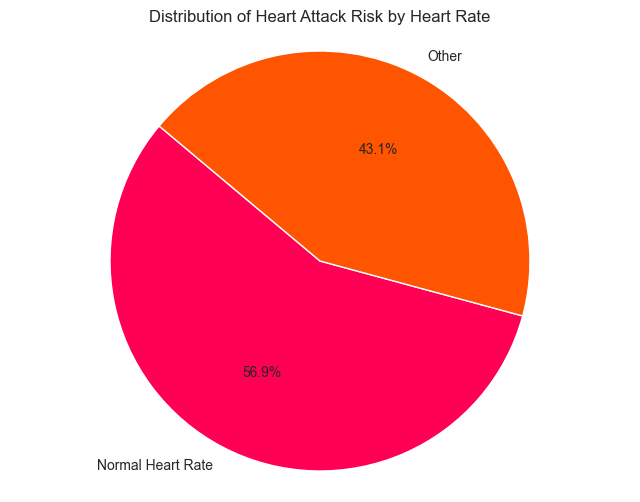

In [17]:
normal_heart_rate_yes = data[((data['Heart Rate'] >= 60) & (data['Heart Rate'] <= 100)) & (data['Heart Attack Risk'] == 'Yes')]
other_yes = data[((data['Heart Rate'] < 60) | (data['Heart Rate'] > 100)) & (data['Heart Attack Risk'] == 'Yes')]


count_normal_heart_rate_yes = len(normal_heart_rate_yes)
count_other_yes = len(other_yes)

labels = ['Normal Heart Rate', 'Other']

sizes = [count_normal_heart_rate_yes, count_other_yes]
print(sizes)
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['#ff0054', '#ff5400'], startangle=140)
plt.title('Distribution of Heart Attack Risk by Heart Rate')
plt.axis('equal') 
plt.show()


C:\Users\Sancho\AppData\Local\Temp\ipykernel_18704\1186720620.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], kde=True, hist=True , color = '#489fb5')


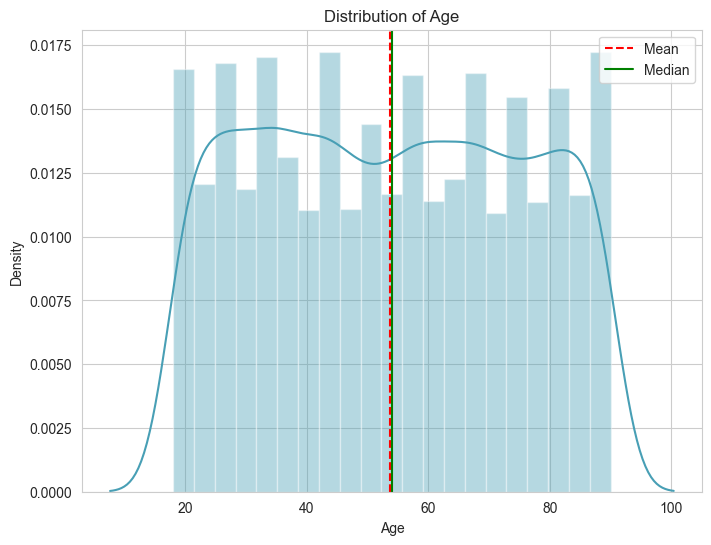

C:\Users\Sancho\AppData\Local\Temp\ipykernel_18704\1186720620.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], kde=True, hist=True , color = '#489fb5')


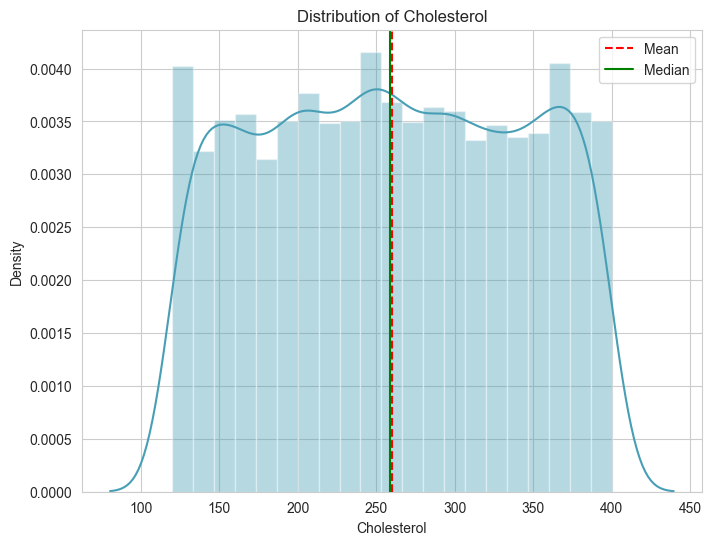

C:\Users\Sancho\AppData\Local\Temp\ipykernel_18704\1186720620.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], kde=True, hist=True , color = '#489fb5')


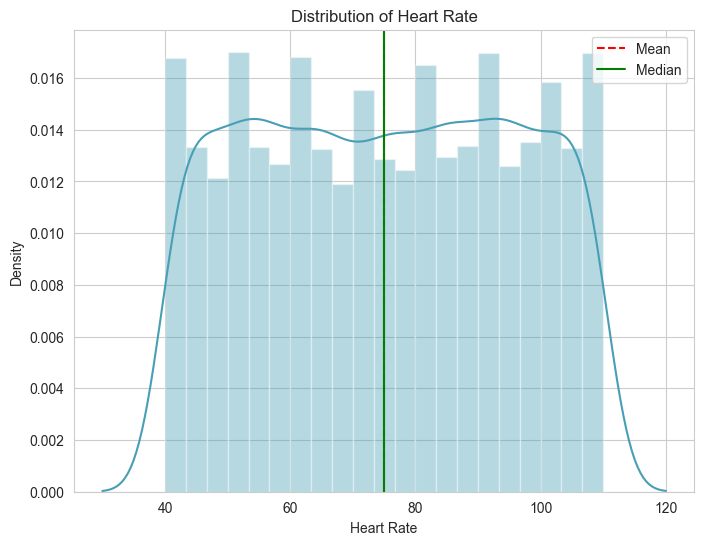

C:\Users\Sancho\AppData\Local\Temp\ipykernel_18704\1186720620.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], kde=True, hist=True , color = '#489fb5')


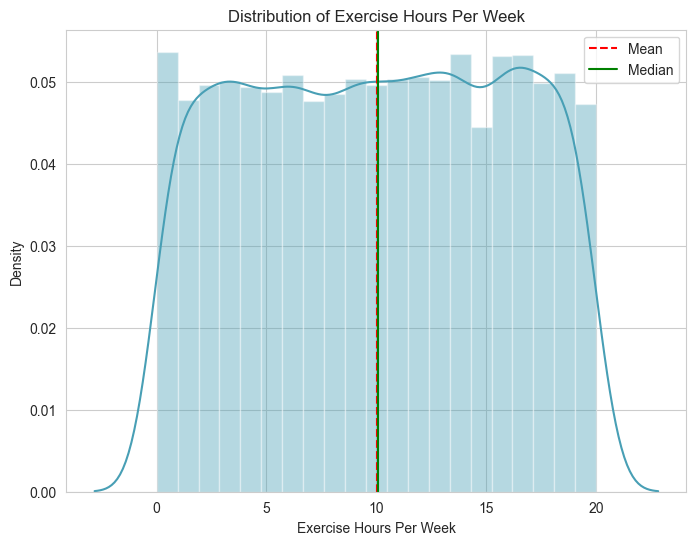

C:\Users\Sancho\AppData\Local\Temp\ipykernel_18704\1186720620.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], kde=True, hist=True , color = '#489fb5')


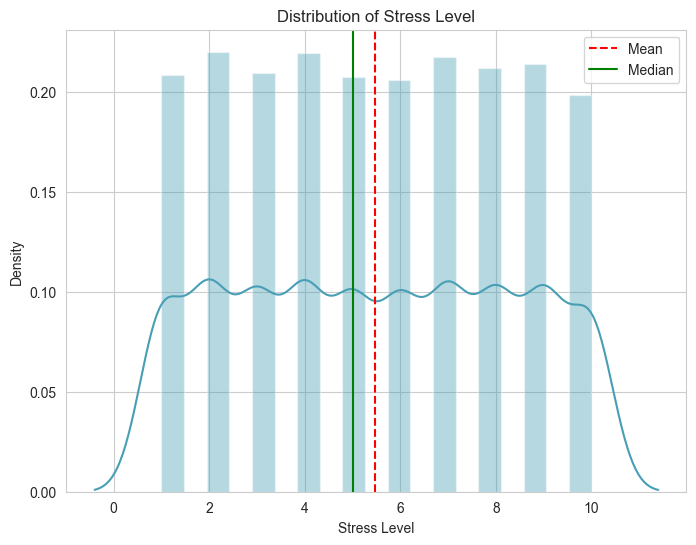

C:\Users\Sancho\AppData\Local\Temp\ipykernel_18704\1186720620.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], kde=True, hist=True , color = '#489fb5')


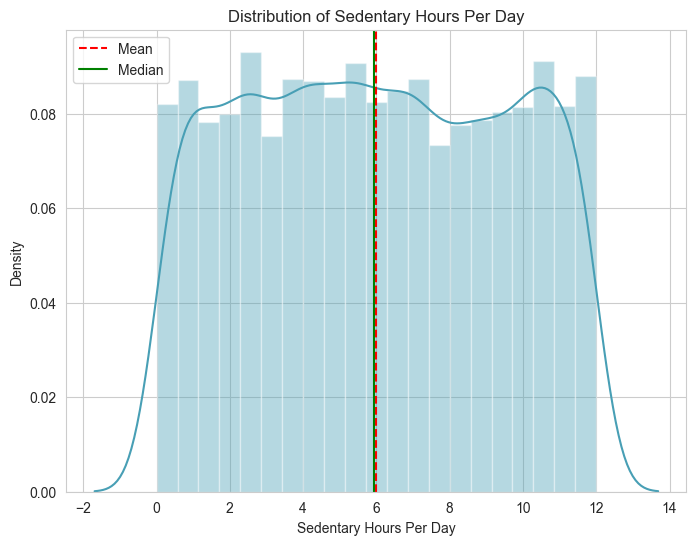

C:\Users\Sancho\AppData\Local\Temp\ipykernel_18704\1186720620.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], kde=True, hist=True , color = '#489fb5')


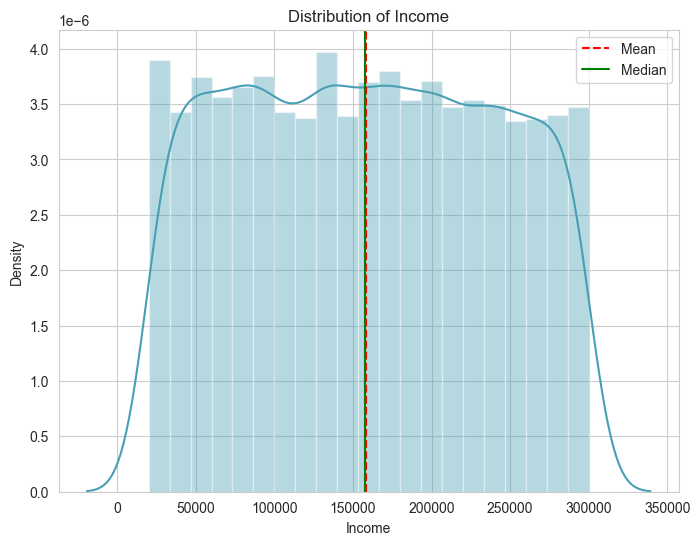

C:\Users\Sancho\AppData\Local\Temp\ipykernel_18704\1186720620.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], kde=True, hist=True , color = '#489fb5')


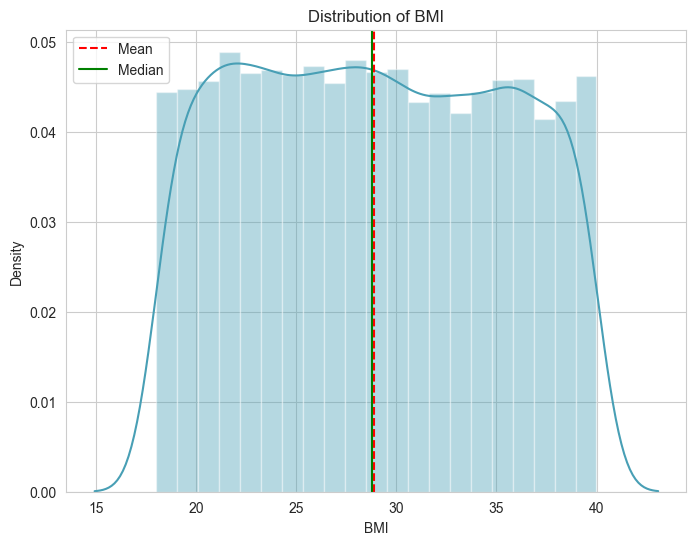

C:\Users\Sancho\AppData\Local\Temp\ipykernel_18704\1186720620.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], kde=True, hist=True , color = '#489fb5')


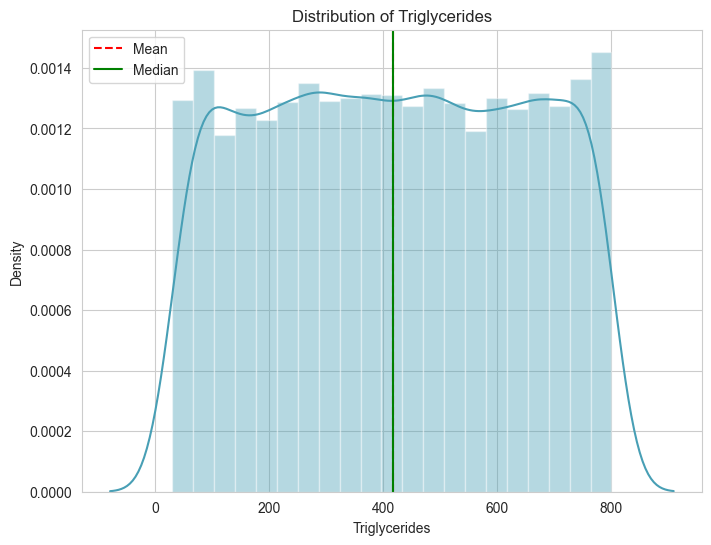

C:\Users\Sancho\AppData\Local\Temp\ipykernel_18704\1186720620.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], kde=True, hist=True , color = '#489fb5')


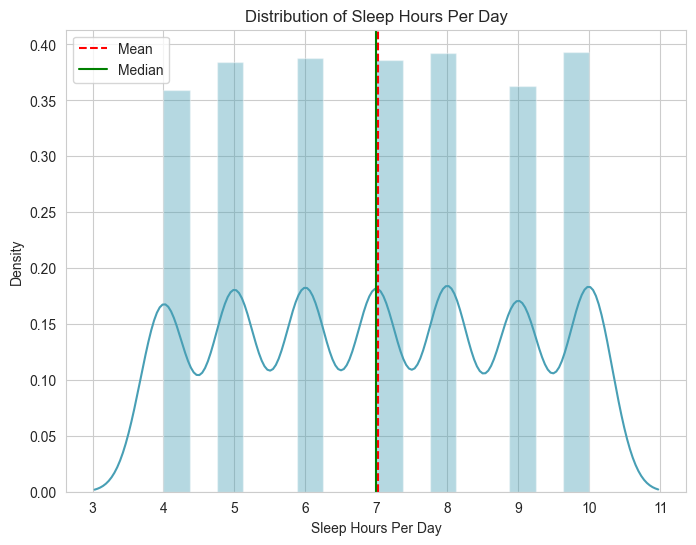

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = data.select_dtypes(include=['number'])

for col in numeric_columns.columns:
    plt.figure(figsize=(8, 6))
    sns.distplot(data[col], kde=True, hist=True , color = '#489fb5')
    plt.axvline(data[col].mean(), color='r', linestyle='--', label='Mean')
    plt.axvline(data[col].median(), color='g', linestyle='-', label='Median')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.title(f'Distribution of {col}')
    plt.legend()
    plt.show()


In [19]:
df_pivot_mean= pd.pivot_table(data,values="Triglycerides",index="Sex",columns="Diet", aggfunc=np.mean)
df_pivot_mean

C:\Users\Sancho\AppData\Local\Temp\ipykernel_18704\602806762.py:1: FutureWarning: The provided callable <function mean at 0x000001B0717F7CE0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df_pivot_mean= pd.pivot_table(data,values="Triglycerides",index="Sex",columns="Diet", aggfunc=np.mean)


Diet,Average,Healthy,Unhealthy
Sex,,,
Female,408.681609,413.291480,427.897753
Male,415.742409,417.125242,421.541729


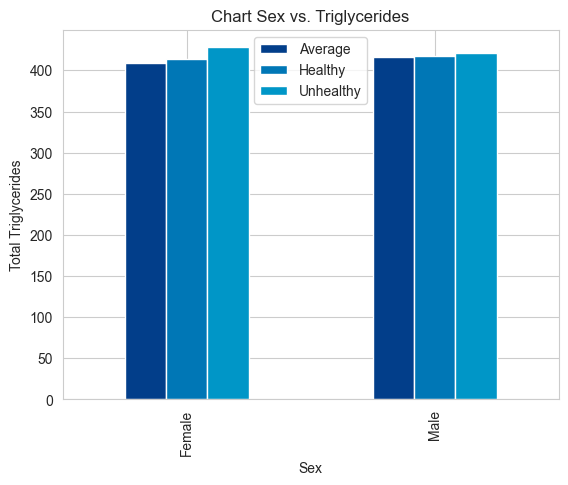

In [20]:
df_pivot_mean.plot(kind="bar", color=['#023e8a','#0077b6','#0096c7'])
plt.title('Chart Sex vs. Triglycerides')
plt.xlabel('Sex')
plt.ylabel('Total Triglycerides')
plt.legend(loc='upper center')

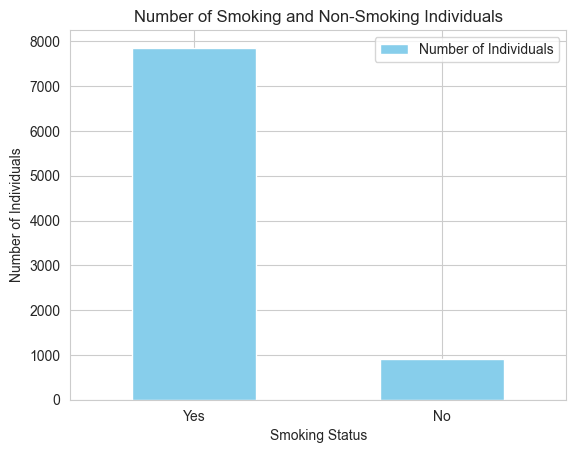

In [21]:
smoking_counts = data['Smoking'].value_counts()

smoking_df = pd.DataFrame({'Smoking Status': smoking_counts.index, 'Number of Individuals': smoking_counts.values})

smoking_df['Smoking Status'] = smoking_df['Smoking Status'].replace({'no': 'Not Smoking', 'yes': 'Smoking'})

smoking_df.plot(kind='bar', x='Smoking Status', y='Number of Individuals', color='skyblue')
plt.title('Number of Smoking and Non-Smoking Individuals')
plt.xlabel('Smoking Status')
plt.ylabel('Number of Individuals')
plt.xticks(rotation=0)
plt.show()

the code generates a bar plot comparing the mean total triglycerides levels between different sexes and diet types

Text(0, 0.5, 'Number of Individuals')

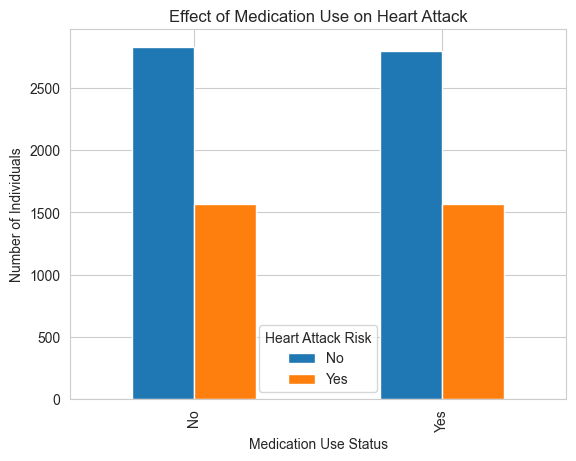

In [22]:
heart_attack_counts = data.groupby(['Medication Use','Heart Attack Risk']).size().unstack()
heart_attack_counts.plot(kind='bar')
plt.title('Effect of Medication Use on Heart Attack')
plt.xlabel('Medication Use Status')
plt.ylabel('Number of Individuals')

Text(0, 0.5, 'Number of Individuals')

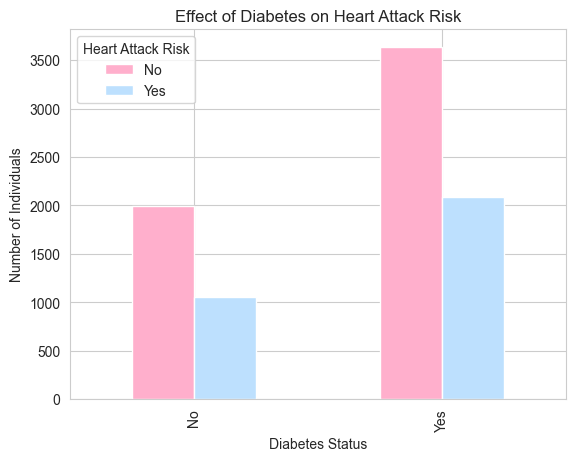

In [23]:
heart_attack_counts = data.groupby(['Diabetes', 'Heart Attack Risk']).size().unstack()
heart_attack_counts.plot(kind='bar', color=['#ffafcc','#bde0fe'])
plt.title('Effect of Diabetes on Heart Attack Risk')
plt.xlabel('Diabetes Status')
plt.ylabel('Number of Individuals')

Text(0, 0.5, 'Number of Individuals')

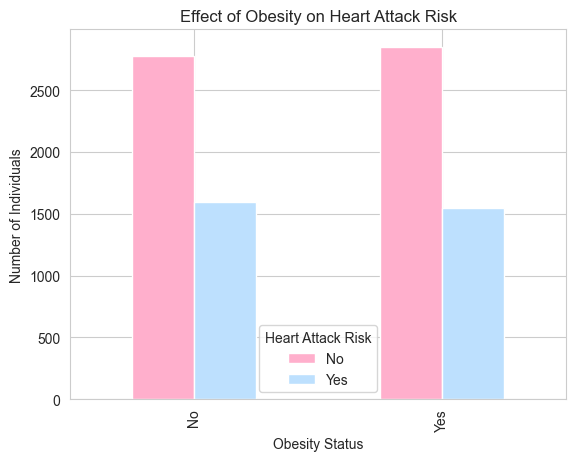

In [24]:
heart_attack_counts = data.groupby(['Obesity', 'Heart Attack Risk']).size().unstack()
heart_attack_counts.plot(kind='bar', color=['#ffafcc','#bde0fe'])
plt.title('Effect of Obesity on Heart Attack Risk')
plt.xlabel('Obesity Status')
plt.ylabel('Number of Individuals')

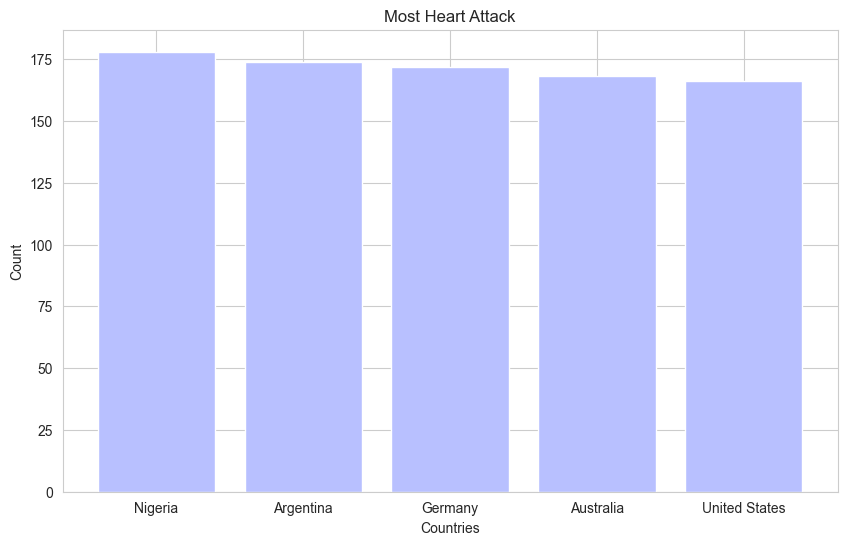

In [25]:
def country_and_attack(title,hasAttack = 'Yes'):
    new_data = data[["Country","Heart Attack Risk"]]
    no_risk = new_data[new_data["Heart Attack Risk"] == hasAttack] 
    count_country = no_risk["Country"].value_counts() 
    top_countries = count_country.nlargest(5) 

    plt.figure(figsize=(10,6))
    plt.bar(top_countries.index,top_countries.values , color = '#b8c0ff')
    plt.xlabel("Countries")
    plt.ylabel("Count")
    plt.title(title)
    plt.show()
    
country_and_attack("Most Heart Attack",hasAttack = 'Yes')

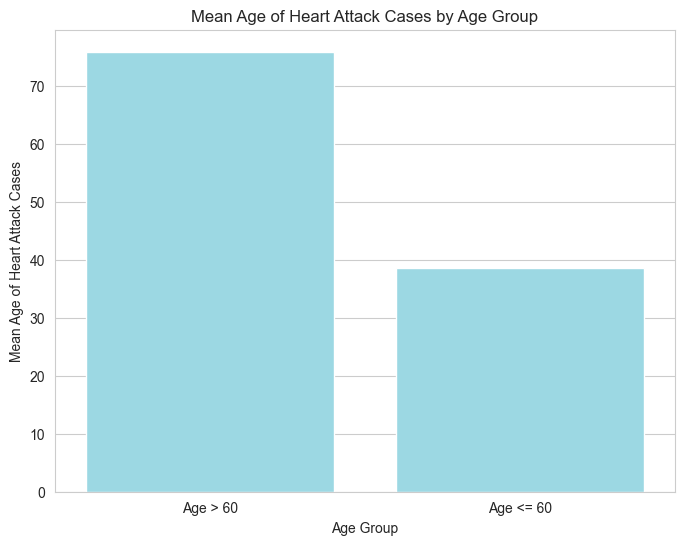

In [26]:
data_over_60_yes = data[(data['Age'] > 60) & (data['Heart Attack Risk'] == 'Yes')]
data_under_60_yes = data[(data['Age'] <= 60) & (data['Heart Attack Risk'] == 'Yes')]

mean_age_over_60_yes = data_over_60_yes['Age'].mean()
mean_age_under_60_yes = data_under_60_yes['Age'].mean()

plt.figure(figsize=(8, 6))
sns.barplot(x=['Age > 60', 'Age <= 60'], y=[mean_age_over_60_yes, mean_age_under_60_yes] , color = '#90e0ef')
plt.xlabel('Age Group')
plt.ylabel('Mean Age of Heart Attack Cases')
plt.title('Mean Age of Heart Attack Cases by Age Group')
plt.show()

# Machine learning Models
1- Logestic Regression : 
   
   Logistic regression is a statistical method commonly used for binary classification tasks, such as predicting the likelihood of a heart attack. It models the relationship between one or more independent variables (features) and a dependent variable (outcome) by estimating probabilities using a logistic function

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
sns.set_style('dark')
from scipy.cluster.hierarchy import dendrogram ,linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import math
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [28]:
data=pd.read_csv('heart_attack.csv')
data.head(10)

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0
5,ZOO7941,54,Female,297,172/86,48,1,1,1,0,...,7.798752,241339,20.146839,795,5,10,Germany,Europe,Northern Hemisphere,1
6,WYV0966,90,Male,358,102/73,84,0,0,1,0,...,0.627356,190450,28.885811,284,4,10,Canada,North America,Northern Hemisphere,1
7,XXM0972,84,Male,220,131/68,107,0,0,1,1,...,10.543780,122093,22.221862,370,6,7,Japan,Asia,Northern Hemisphere,1
8,XCQ5937,20,Male,145,144/105,68,1,0,1,1,...,11.348787,25086,35.809901,790,7,4,Brazil,South America,Southern Hemisphere,0
9,FTJ5456,43,Female,248,160/70,55,0,1,1,1,...,4.055115,209703,22.558917,232,7,7,Japan,Asia,Northern Hemisphere,0


In [ ]:
null_values = data.isnull().sum()
print("Null values:")
print(null_values)
duplicate_rows = data[data.duplicated()]
print("\nDuplicate rows:")
print(duplicate_rows)


Null values:
Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

Duplicate r

Correlation Matrix:
                                      Age  Cholesterol  Heart Rate  Diabetes  \
Age                              1.000000    -0.009107   -0.003844 -0.014105   
Cholesterol                     -0.009107     1.000000    0.000315 -0.013428   
Heart Rate                      -0.003844     0.000315    1.000000  0.006764   
Diabetes                        -0.014105    -0.013428    0.006764  1.000000   
Family History                   0.008353    -0.021608   -0.013470 -0.013844   
Smoking                          0.394891     0.016342   -0.012331  0.000527   
Obesity                         -0.008140    -0.014843    0.012725  0.012866   
BMI                             -0.002612     0.017292    0.005299 -0.002852   
Triglycerides                    0.003415    -0.005454    0.012244  0.010431   
Physical Activity Days Per Week  0.001384     0.016056    0.000834 -0.002411   
Sleep Hours Per Day             -0.002185     0.004456    0.001811 -0.012457   
Systolic_BP         

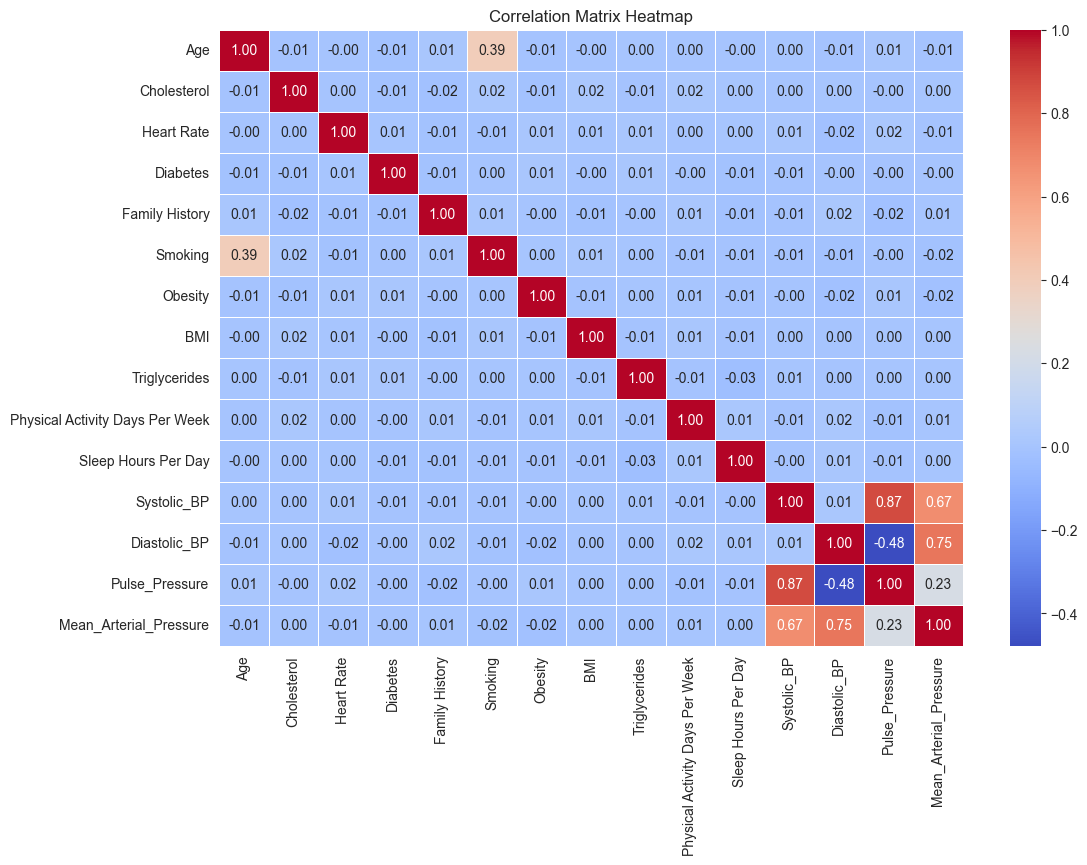

In [30]:
data[['Systolic_BP', 'Diastolic_BP']] = data['Blood Pressure'].str.split('/', expand=True).astype(int)
data['Pulse_Pressure'] = data['Systolic_BP'] - data['Diastolic_BP']
data['Mean_Arterial_Pressure'] = (data['Systolic_BP'] + 2 * data['Diastolic_BP']) / 3

features = ['Age', 'Cholesterol', 'Heart Rate', 'Diabetes', 'Family History',
            'Smoking', 'Obesity', 'BMI', 'Triglycerides', 
            'Physical Activity Days Per Week', 'Sleep Hours Per Day', 
            'Systolic_BP', 'Diastolic_BP', 'Pulse_Pressure', 'Mean_Arterial_Pressure']

correlation_matrix = data[features].corr()

print("Correlation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [31]:
data[['Systolic_BP', 'Diastolic_BP']] = data['Blood Pressure'].str.split('/', expand=True).astype(int)

data['Pulse_Pressure'] = data['Systolic_BP'] - data['Diastolic_BP']
data['Mean_Arterial_Pressure'] = (data['Systolic_BP'] + 2 * data['Diastolic_BP']) / 3

data.head(10)

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Systolic_BP,Diastolic_BP,Pulse_Pressure,Mean_Arterial_Pressure
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,0,6,Argentina,South America,Southern Hemisphere,0,158,88,70,111.333333
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,1,7,Canada,North America,Northern Hemisphere,0,165,93,72,117.000000
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,4,4,France,Europe,Northern Hemisphere,0,174,99,75,124.000000
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,3,4,Canada,North America,Northern Hemisphere,0,163,100,63,121.000000
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1,5,Thailand,Asia,Northern Hemisphere,0,91,88,3,89.000000
5,ZOO7941,54,Female,297,172/86,48,1,1,1,0,...,5,10,Germany,Europe,Northern Hemisphere,1,172,86,86,114.666667
6,WYV0966,90,Male,358,102/73,84,0,0,1,0,...,4,10,Canada,North America,Northern Hemisphere,1,102,73,29,82.666667
7,XXM0972,84,Male,220,131/68,107,0,0,1,1,...,6,7,Japan,Asia,Northern Hemisphere,1,131,68,63,89.000000
8,XCQ5937,20,Male,145,144/105,68,1,0,1,1,...,7,4,Brazil,South America,Southern Hemisphere,0,144,105,39,118.000000
9,FTJ5456,43,Female,248,160/70,55,0,1,1,1,...,7,7,Japan,Asia,Northern Hemisphere,0,160,70,90,100.000000


In [32]:
x = data[['Age','Cholesterol','Heart Rate', 
          'Diabetes', 'Family History', 'Smoking', 'Obesity', 'BMI', 
          'Triglycerides', 'Physical Activity Days Per Week', 'Systolic_BP','Diastolic_BP','Pulse_Pressure','Mean_Arterial_Pressure']]

y=data['Heart Attack Risk']

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,BMI,Triglycerides,Physical Activity Days Per Week,Systolic_BP,Diastolic_BP,Pulse_Pressure,Mean_Arterial_Pressure
5967,84,217,75,1,1,1,1,35.185856,544,3,125,83,42,97.000000
8270,88,209,104,1,0,1,0,30.991599,649,2,131,72,59,91.666667
100,90,224,98,1,0,1,0,22.851796,255,4,164,65,99,98.000000
3410,27,376,65,0,0,1,0,37.513424,796,1,141,70,71,93.666667
1790,55,270,94,0,1,1,1,23.269040,450,2,146,81,65,102.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,48,334,43,1,0,1,1,33.549888,549,4,94,82,12,86.000000
5191,68,188,69,0,0,1,0,26.142883,410,2,116,70,46,85.333333
5390,32,169,84,1,0,0,1,39.512660,777,4,156,79,77,104.666667
860,85,285,54,1,1,1,1,25.499506,552,1,165,73,92,103.666667


In [34]:
model= LogisticRegression()
model.fit(x_train,y_train)

c:\Users\Sancho\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
prediction=model.predict(x_test)
print(prediction)

[0 0 0 ... 0 0 0]


In [36]:
accuracy = accuracy_score(y_test, prediction)
print("Accuracy:", accuracy*100)

Accuracy: 64.17569880205363


2- Decition Tree

When we applied the decision tree without first checking the feature importance and hyperparameters that satisfy the model, we ended up with poor accuracy

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

x = data[['Age', 'Cholesterol', 'Heart Rate', 
          'Diabetes', 'Family History', 'Smoking', 'Obesity', 'BMI', 
          'Triglycerides', 'Physical Activity Days Per Week', 
          'Sleep Hours Per Day', 'Systolic_BP', 'Diastolic_BP', 
          'Pulse_Pressure', 'Mean_Arterial_Pressure']]

y = data['Heart Attack Risk']  

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(x_train, y_train)

predictions = model.predict(x_test)

accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy * 100)
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))


Accuracy: 57.387335995436395
Confusion Matrix:
 [[754 371]
 [376 252]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.67      0.67      1125
           1       0.40      0.40      0.40       628

    accuracy                           0.57      1753
   macro avg       0.54      0.54      0.54      1753
weighted avg       0.57      0.57      0.57      1753



First, we used the feature_importances_ attribute from the library to identify the most important features and utilized them to improve the model's accuracy

                            Feature  Importance
7                               BMI    0.124117
1                       Cholesterol    0.112866
2                        Heart Rate    0.108303
8                     Triglycerides    0.105528
0                               Age    0.095719
11                      Systolic_BP    0.078192
12                     Diastolic_BP    0.075543
14           Mean_Arterial_Pressure    0.074591
13                   Pulse_Pressure    0.073269
9   Physical Activity Days Per Week    0.054038
10              Sleep Hours Per Day    0.051561
3                          Diabetes    0.017074
4                    Family History    0.011367
6                           Obesity    0.011060
5                           Smoking    0.006772


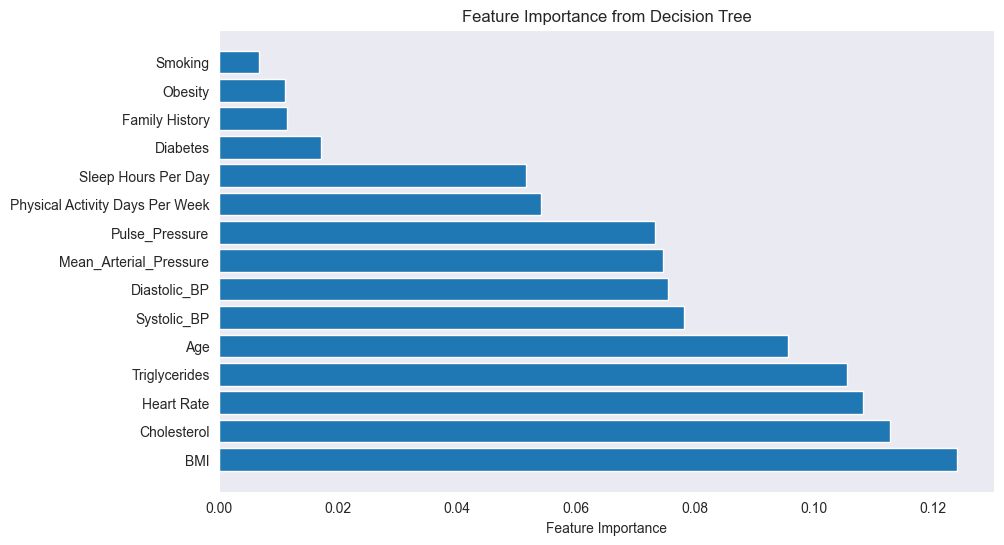

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import matplotlib.pyplot as plt

model = DecisionTreeClassifier(random_state=42)
model.fit(x_train, y_train)

feature_importances = model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': feature_importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Decision Tree')
plt.show()


Then, we used Grid Search with 5-fold cross-validation (CV) to train and test on all the data, aiming to find the best hyperparameters. To determine the optimal tree configuration, we discovered that using entropy instead of the Gini index, which calculates data impurities, resulted in a better splitting criterion. By calculating information gain, which reduces entropy, we were able to make the best decisions and construct a decision tree with the highest accuracy

In [ ]:
selected_features = [
    'BMI', 'Cholesterol', 'Heart Rate', 
]

x_train_selected = x_train[selected_features]
x_test_selected = x_test[selected_features]

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)

grid_search.fit(x_train_selected, y_train)

print("Best Parameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_

predictions = best_model.predict(x_test_selected)

accuracy = accuracy_score(y_test, predictions)
print("Improved Accuracy with Selected Features:", accuracy * 100)


Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Improved Accuracy with Selected Features: 64.3468339988591


Then, we checked whether the F1 score could be used to evaluate the model's performance. We found that it was better to use accuracy instead of the F1 score

In [40]:
from sklearn.metrics import accuracy_score, f1_score

predictions = best_model.predict(x_test_selected)

accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy * 100)

f1 = f1_score(y_test, predictions)
print("F1-Score:", f1)

if f1 > accuracy:
    print("F1-Score is better than Accuracy in this case.")
else:
    print("Accuracy is better than F1-Score in this case.")


Accuracy: 64.3468339988591
F1-Score: 0.039938556067588324
Accuracy is better than F1-Score in this case.


By applying GridSearchCV, you optimize hyperparameters such as criterion, max_depth, and min_samples_split, leading to better accuracy and more generalizable models

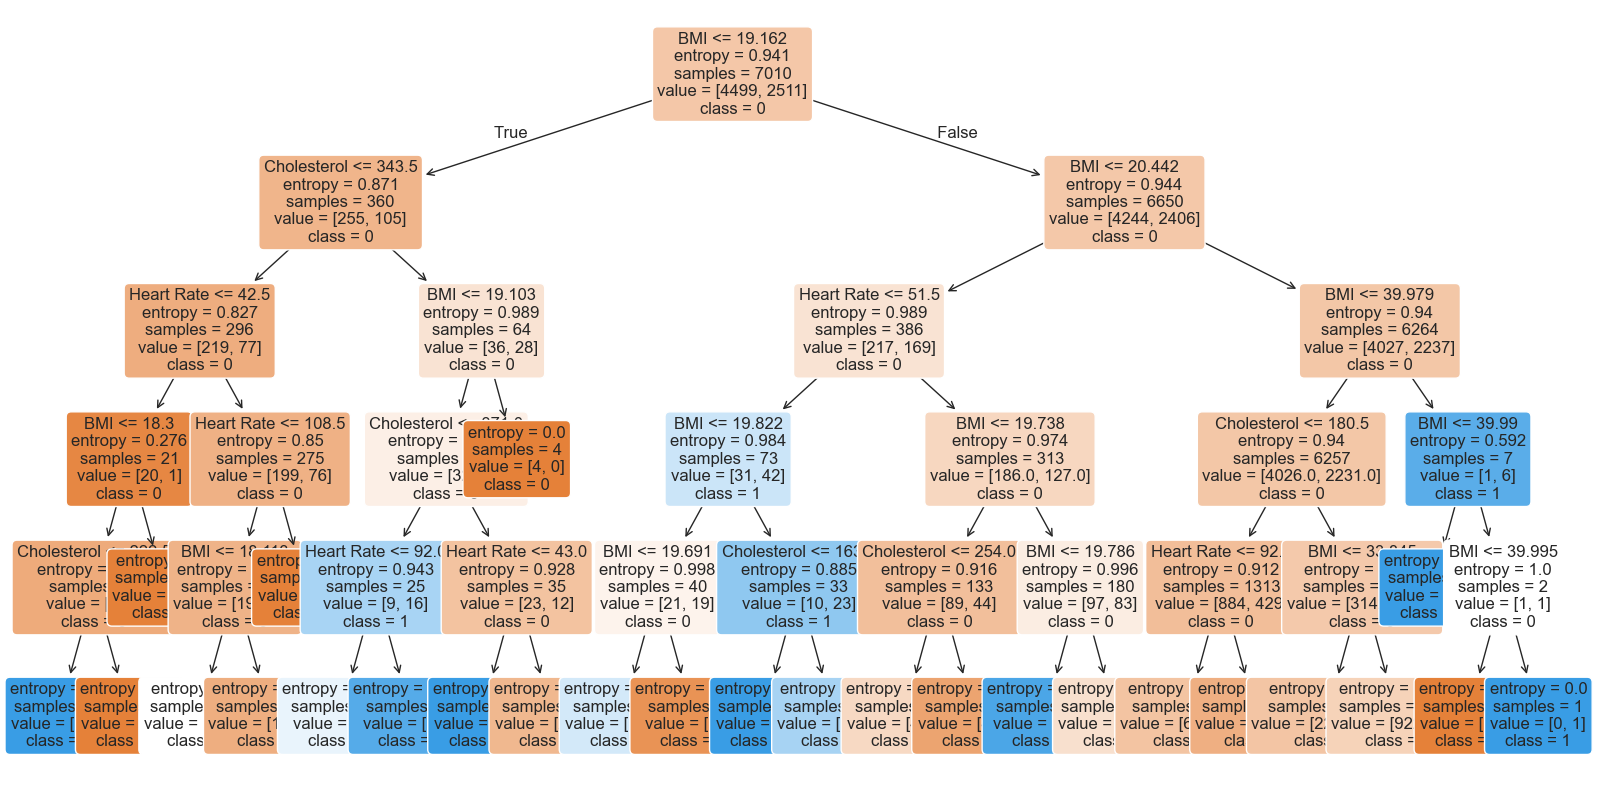

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(best_model, 
          feature_names=x_train_selected.columns,  
          class_names=[str(label) for label in best_model.classes_], 
          filled=True,  
          rounded=True,  
          fontsize=12)  

plt.show()


The selected features—BMI, Cholesterol, and Heart Rate—are identified by the model as the most critical for predicting heart attack risk based on their feature importance values. Visualizing the decision tree provides insight into how these features influence the decision-making process at various splits.

BMI has the highest feature importance (0.124117), making it the most influential factor for the model in determining heart attack risk. As a result, it serves as the most important starting node for training the model.

3- k-medoid

In [42]:
import pandas as pd
import numpy as np
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore',category=UserWarning)

In [ ]:
newdata=pd.read_csv('heart_attack.csv')
newdata.head(10)

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0
5,ZOO7941,54,Female,297,172/86,48,1,1,1,0,...,7.798752,241339,20.146839,795,5,10,Germany,Europe,Northern Hemisphere,1
6,WYV0966,90,Male,358,102/73,84,0,0,1,0,...,0.627356,190450,28.885811,284,4,10,Canada,North America,Northern Hemisphere,1
7,XXM0972,84,Male,220,131/68,107,0,0,1,1,...,10.543780,122093,22.221862,370,6,7,Japan,Asia,Northern Hemisphere,1
8,XCQ5937,20,Male,145,144/105,68,1,0,1,1,...,11.348787,25086,35.809901,790,7,4,Brazil,South America,Southern Hemisphere,0
9,FTJ5456,43,Female,248,160/70,55,0,1,1,1,...,4.055115,209703,22.558917,232,7,7,Japan,Asia,Northern Hemisphere,0


In [44]:
newdata=pd.DataFrame(newdata)

In [45]:
data_subset=newdata[['Age','Heart Attack Risk','Cholesterol']]
sample_size = 1000  
data_subset_sample = data_subset.sample(n=sample_size, random_state=0)
data_KMedoid = np.array(data_subset_sample) 

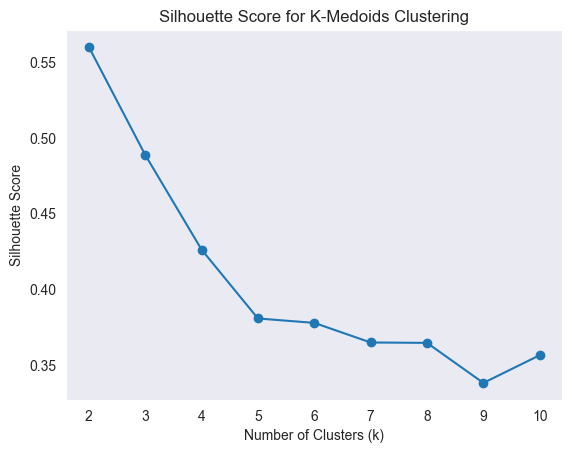

In [46]:
silhouette_scores = []
k_values = range(2, 11)
for k in k_values:
    kmedoids = KMedoids(n_clusters=k, random_state=42)
    kmedoids.fit(data_KMedoid )
    labels = kmedoids.fit_predict(data_KMedoid )
    silhouette_scores.append(silhouette_score(data_KMedoid ,   labels ))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for K-Medoids Clustering')
plt.show()

In [47]:
k = 3
kmedoids = KMedoids(n_clusters=k).fit(data_KMedoid) 
clusters=kmedoids .cluster_centers_
labels=kmedoids .labels_

In [48]:
print("Cluster Centers:")
print(clusters)
print("Labels:")
print(labels)

Cluster Centers:
[[ 56.   1. 255.]
 [ 53.   0. 357.]
 [ 50.   1. 163.]]
Labels:
[2 0 2 2 2 2 1 0 2 1 2 0 2 2 1 2 1 0 1 0 1 2 0 0 1 1 0 1 2 0 0 0 1 0 1 0 2
 2 1 1 1 0 2 1 0 2 1 1 0 2 1 0 0 2 1 0 0 1 1 0 2 1 1 1 0 1 0 0 2 1 2 0 1 1
 0 2 2 1 1 0 0 0 2 0 2 2 2 0 2 0 2 0 2 0 0 0 1 2 0 0 0 0 1 0 0 2 2 1 1 2 0
 0 0 1 0 1 2 2 0 2 1 2 2 1 2 1 0 2 2 1 2 1 0 1 2 2 2 0 0 1 2 2 0 0 2 0 2 1
 2 2 1 2 1 2 1 2 0 0 0 1 2 0 0 1 2 1 2 0 2 0 1 0 2 1 0 0 0 1 2 2 0 0 1 0 1
 2 1 1 0 1 0 0 0 0 0 0 0 2 2 1 0 1 2 0 2 2 2 1 0 2 1 1 2 0 2 2 0 2 0 2 1 0
 2 0 2 0 0 0 0 2 0 2 1 2 1 0 0 2 1 2 2 2 1 2 0 0 2 2 2 0 2 2 0 0 0 2 2 2 1
 1 2 0 0 2 2 0 2 2 0 2 0 1 1 1 1 1 0 0 0 2 2 1 1 1 2 2 1 1 1 0 0 1 1 0 1 0
 0 2 0 0 1 2 0 2 2 0 1 1 2 0 2 1 1 1 2 0 2 0 1 1 2 1 1 1 1 0 1 1 1 2 0 2 1
 1 0 1 1 0 1 0 1 1 2 2 0 0 0 1 1 2 2 1 1 1 2 2 2 0 1 0 1 0 2 1 1 0 1 0 1 1
 0 2 0 0 0 1 2 1 2 2 2 1 0 0 0 1 2 0 1 1 2 2 1 1 1 1 1 2 1 2 0 1 0 0 0 1 1
 0 2 0 0 2 2 0 0 0 1 2 2 0 0 1 0 0 0 2 2 2 1 0 1 0 1 0 2 1 0 2 2 2 2 0 2 1
 0 1 2 2 1 0 1 2 0 2

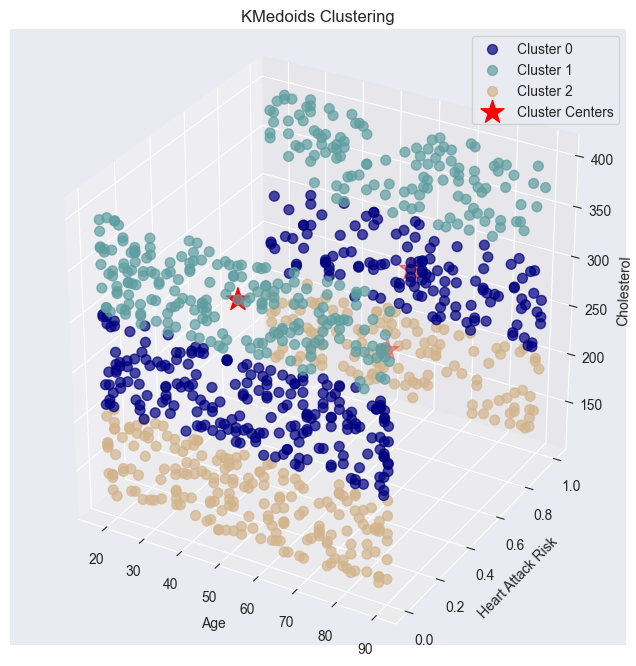

In [ ]:
cluster_colors = ['navy', 'cadetblue', 'tan'] 

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for cluster_label, color in zip(range(k), cluster_colors):
    cluster_points = data_KMedoid[labels == cluster_label]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], c=color, label=f'Cluster {cluster_label}', s=50, alpha=0.7)#define colour for each cluster

ax.scatter(clusters[:, 0], clusters[:, 1], clusters[:, 2], c='red', marker='*', s=300, label='Cluster Centers')#plotting

ax.set_xlabel('Age')
ax.set_ylabel('Heart Attack Risk')
ax.set_zlabel('Cholesterol')
ax.set_box_aspect([1, 1, 1])
ax.legend(loc='upper right')
plt.title('KMedoids Clustering')
plt.grid(True)
plt.show()

evaluation of k-medoid


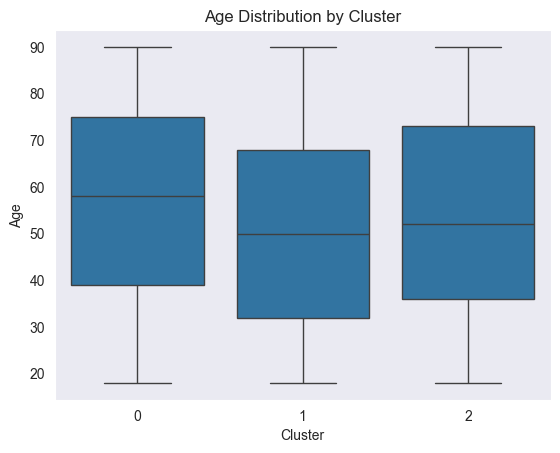

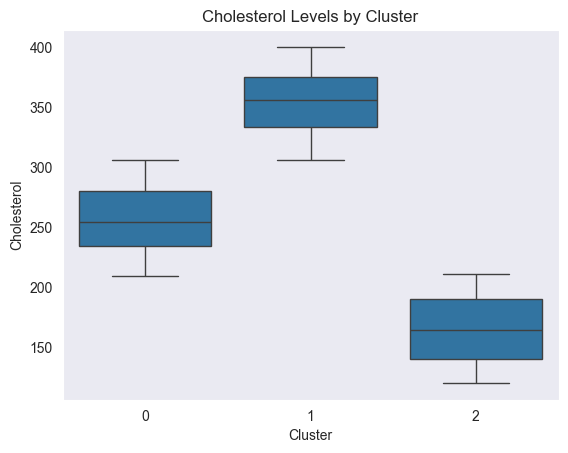

In [ ]:
data_subset_sample['Cluster'] = labels
sns.boxplot(x='Cluster', y='Age', data=data_subset_sample)
plt.title('Age Distribution by Cluster')
plt.show()


sns.boxplot(x='Cluster', y='Cholesterol', data=data_subset_sample)
plt.title('Cholesterol Levels by Cluster')
plt.show()


In [ ]:
kmedoids = KMedoids(n_clusters=k, random_state=42)
labels = kmedoids.fit_predict(data_KMedoid)

silhouette_avg = silhouette_score(data_KMedoid, labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.488697969192395


Insights:

Quality Assessment: Calculating the silhouette score provides a quantitative measure of the clustering quality. It helps in understanding how well-separated the clusters are and how cohesive the data points are within each cluster.

Interpretation: A silhouette score close to 1 indicates that the clusters are well-separated, with data points tightly packed within the clusters. A score near 0 suggests overlapping clusters, while negative scores indicate that data points may have been assigned to incorrect clusters.

Parameter Tuning: By evaluating the silhouette score for different values of k, one can determine the optimal number of clusters. The value of k that maximizes the silhouette score represents the most suitable number of clusters for the given dataset.

Reproducibility: Setting the random state ensures that the clustering results are reproducible. This is important for consistency across different runs of the clustering algorithm.

Output: Printing the silhouette score provides insight into the effectiveness of the clustering algorithm. It helps in comparing different clustering approaches and assessing their performance

4- Hierarchical Clustering

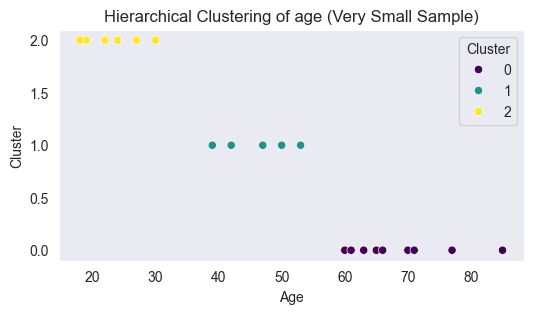

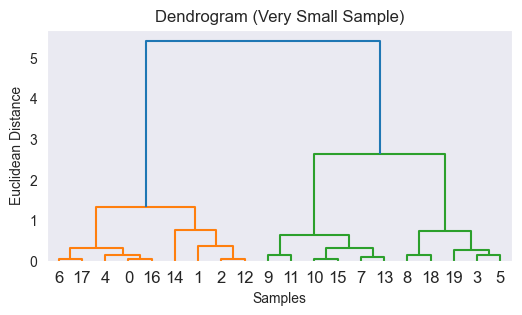

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
sample_size = 20  
X_very_small_sample = data[['Age']].sample(n=sample_size, random_state=42)

scaler = StandardScaler()
X_very_small_sample_scaled = scaler.fit_transform(X_very_small_sample)

cluster = AgglomerativeClustering(n_clusters=3)
clusters_very_small_sample = cluster.fit_predict(X_very_small_sample_scaled)

X_very_small_sample['Cluster'] = clusters_very_small_sample

plt.figure(figsize=(6, 3))
sns.scatterplot(data=X_very_small_sample, x='Age', y='Cluster', palette='viridis', hue='Cluster')
plt.title('Hierarchical Clustering of age (Very Small Sample)')
plt.xlabel('Age')
plt.ylabel('Cluster')
plt.legend(title='Cluster')
plt.show()

plt.figure(figsize=(6, 3))
dendrogram(linkage(X_very_small_sample_scaled, method='ward'))
plt.title('Dendrogram (Very Small Sample)')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distance')
plt.show()


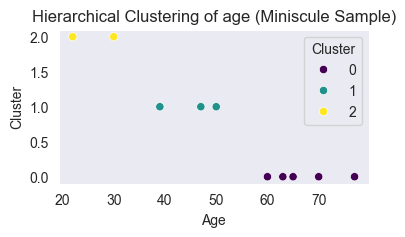

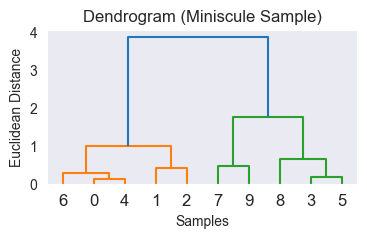

In [53]:
sample_size = 10  
X_miniscule_sample = data[['Age']].sample(n=sample_size, random_state=42)

scaler = StandardScaler()
X_miniscule_sample_scaled = scaler.fit_transform(X_miniscule_sample)

cluster = AgglomerativeClustering(n_clusters=3)
clusters_miniscule_sample = cluster.fit_predict(X_miniscule_sample_scaled)

X_miniscule_sample['Cluster'] = clusters_miniscule_sample

plt.figure(figsize=(4, 2))
sns.scatterplot(data=X_miniscule_sample, x='Age', y='Cluster', palette='viridis', hue='Cluster')
plt.title('Hierarchical Clustering of age (Miniscule Sample)')
plt.xlabel('Age')
plt.ylabel('Cluster')
plt.legend(title='Cluster')
plt.show()

plt.figure(figsize=(4, 2))
dendrogram(linkage(X_miniscule_sample_scaled, method='ward'))
plt.title('Dendrogram (Miniscule Sample)')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distance')
plt.show()

Cluster Characteristics:

You can summarize the characteristics of each cluster. For instance:
Cluster 0: Younger patients, lower heart attack risk.
Cluster 1: Middle-aged patients, moderate heart attack risk.
Cluster 2: Older patients, higher heart attack risk.

Silhouette Score with Ward Linkage: 0.5449443405006034


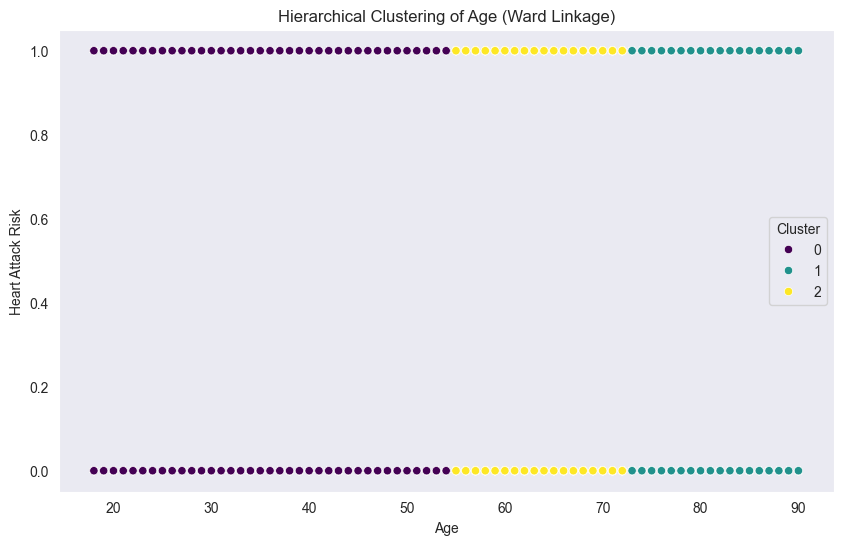

Silhouette Score with Single Linkage: 0.21694115046234522


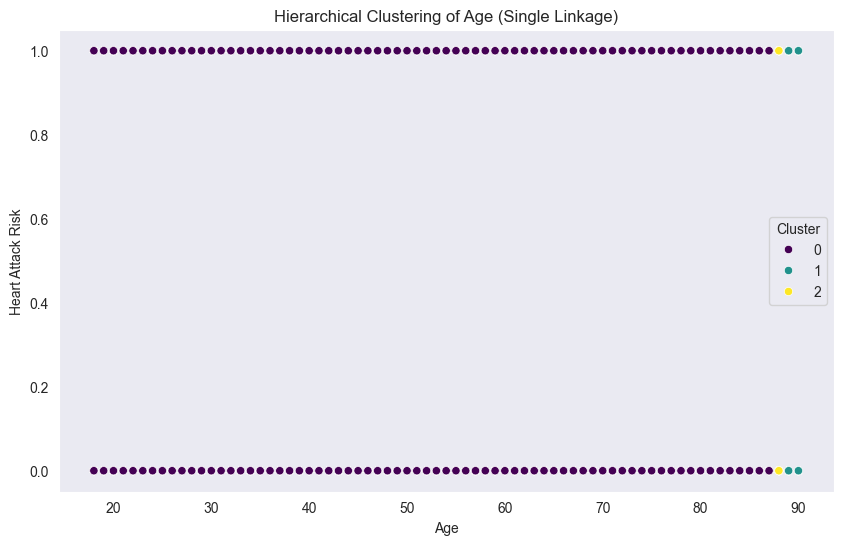

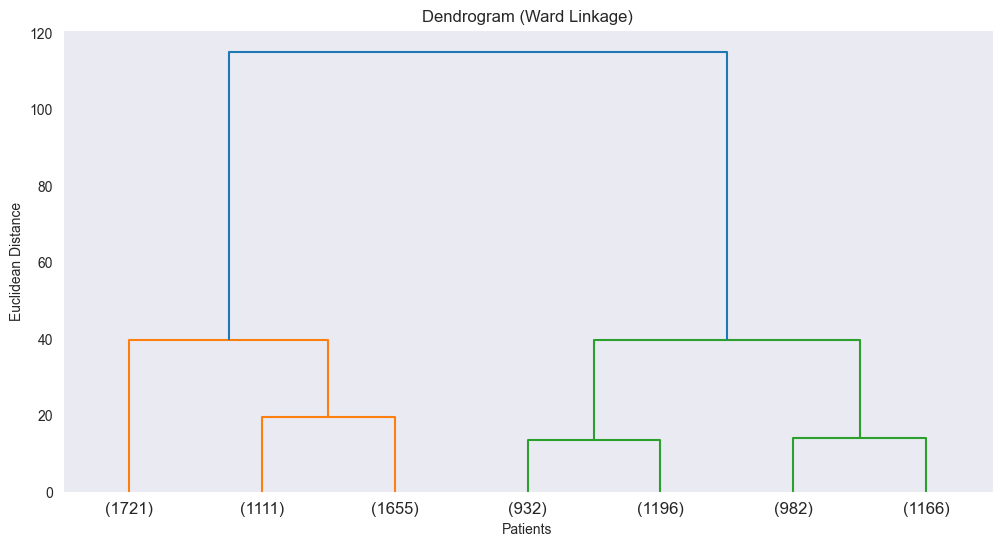

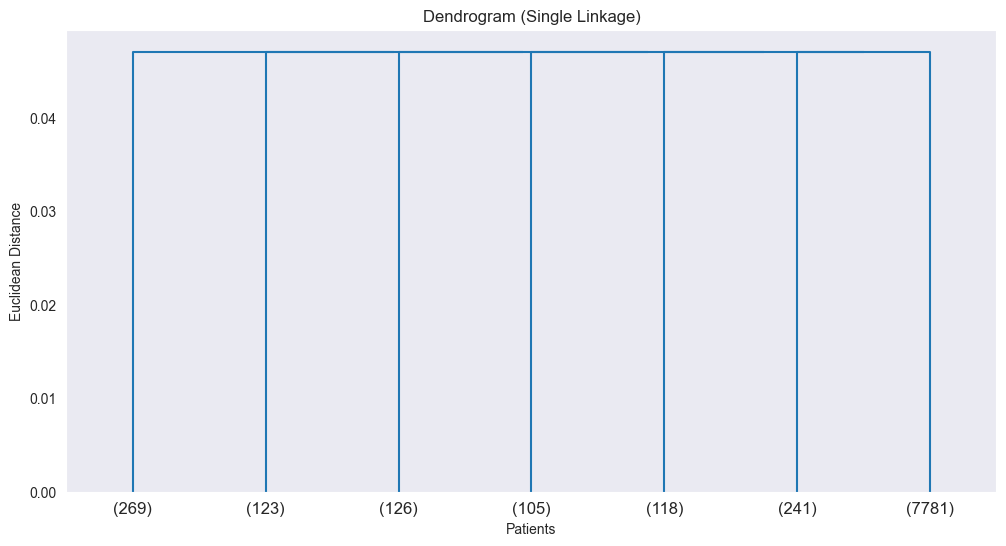

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score

X = data[['Age']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

cluster_ward = AgglomerativeClustering(n_clusters=3)
clusters_ward = cluster_ward.fit_predict(X_scaled)

sil_score_ward = silhouette_score(X_scaled, clusters_ward)
print(f'Silhouette Score with Ward Linkage: {sil_score_ward}')

data['Cluster_Ward'] = clusters_ward

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Age', y='Heart Attack Risk', hue='Cluster_Ward', palette='viridis')
plt.title('Hierarchical Clustering of Age (Ward Linkage)')
plt.xlabel('Age')
plt.ylabel('Heart Attack Risk')
plt.legend(title='Cluster')
plt.show()

cluster_single = AgglomerativeClustering(n_clusters=3, linkage='single')
clusters_single = cluster_single.fit_predict(X_scaled)

sil_score_single = silhouette_score(X_scaled, clusters_single)
print(f'Silhouette Score with Single Linkage: {sil_score_single}')

data['Cluster_Single'] = clusters_single

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Age', y='Heart Attack Risk', hue='Cluster_Single', palette='viridis')
plt.title('Hierarchical Clustering of Age (Single Linkage)')
plt.xlabel('Age')
plt.ylabel('Heart Attack Risk')
plt.legend(title='Cluster')
plt.show()

plt.figure(figsize=(12, 6))
dendrogram(linkage(X_scaled, method='ward'), truncate_mode='lastp', p=7)
plt.title('Dendrogram (Ward Linkage)')
plt.xlabel('Patients')
plt.ylabel('Euclidean Distance')
plt.show()

plt.figure(figsize=(12, 6))
dendrogram(linkage(X_scaled, method='single'), truncate_mode='lastp', p=7)
plt.title('Dendrogram (Single Linkage)')
plt.xlabel('Patients')
plt.ylabel('Euclidean Distance')
plt.show()


Silhouette Score with Ward Linkage: 0.5449443405006034
Silhouette Score with Single Linkage: 0.21694115046234522
The higher Silhouette Score with Ward Linkage indicates that this method creates
better-defined clusters with good cohesion and separation. Therefore, Ward Linkage
is the preferred method for clustering this dataset.



The Silhouette Score is a measure of how similar an object is to its own cluster compared to other clusters. It ranges from -1 to 1:

A score close to +1 indicates that the data points are well clustered, meaning that they are well matched to their own cluster and poorly matched to neighboring clusters.
A score around 0 indicates that the data points are on or very close to the decision boundary between two neighboring clusters.
A score close to -1 indicates that the data points may have been assigned to the wrong cluster.

In [55]:
!pip install scikit-fuzzy

5- Fuzzy Logic

Heart Attack Risk: 5.000000000000002
Fuzzy Rules:
IF age[young] THEN heart_attack_risk[low]
	AND aggregation function : fmin
	OR aggregation function  : fmax
IF age[middle_aged] THEN heart_attack_risk[medium]
	AND aggregation function : fmin
	OR aggregation function  : fmax
IF age[elderly] THEN heart_attack_risk[high]
	AND aggregation function : fmin
	OR aggregation function  : fmax
Heart Attack Risk: 5.000000000000002


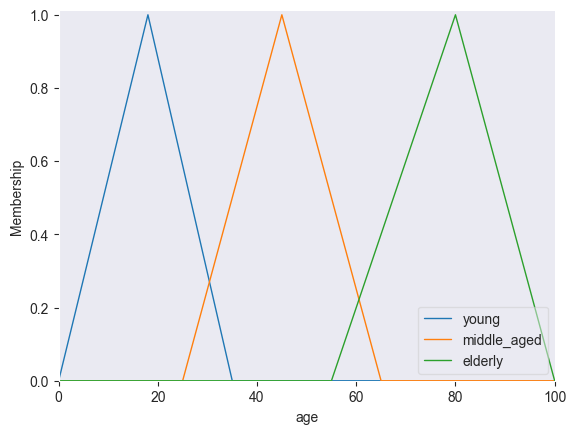

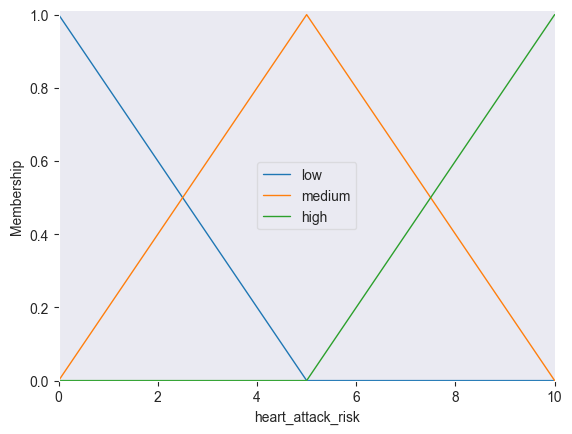

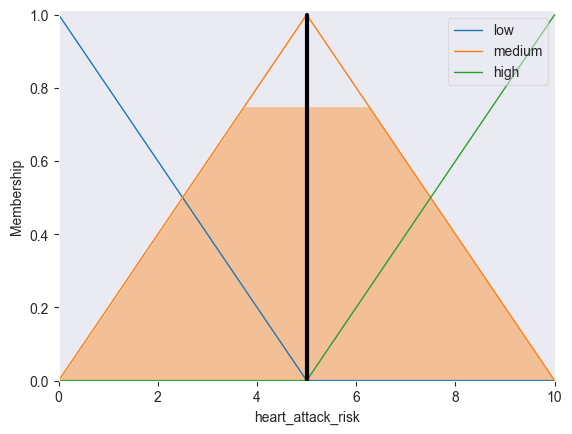

In [56]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

age = ctrl.Antecedent(np.arange(0, 101, 1), 'age')
heart_attack_risk = ctrl.Consequent(np.arange(0, 11, 1), 'heart_attack_risk')

age['young'] = fuzz.trimf(age.universe, [0, 18, 35])
age['middle_aged'] = fuzz.trimf(age.universe, [25, 45, 65])
age['elderly'] = fuzz.trimf(age.universe, [55, 80, 100])

heart_attack_risk['low'] = fuzz.trimf(heart_attack_risk.universe, [0, 0, 5])
heart_attack_risk['medium'] = fuzz.trimf(heart_attack_risk.universe, [0, 5, 10])
heart_attack_risk['high'] = fuzz.trimf(heart_attack_risk.universe, [5, 10, 10])

rule1 = ctrl.Rule(age['young'], heart_attack_risk['low'])
rule2 = ctrl.Rule(age['middle_aged'], heart_attack_risk['medium'])
rule3 = ctrl.Rule(age['elderly'], heart_attack_risk['high'])

heart_attack_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
heart_attack_sim = ctrl.ControlSystemSimulation(heart_attack_ctrl)

heart_attack_sim.input['age'] = 40
heart_attack_sim.compute()
print("Heart Attack Risk:", heart_attack_sim.output['heart_attack_risk'])

age.view()
heart_attack_risk.view()

print("Fuzzy Rules:")
for rule in heart_attack_ctrl.rules:
    print(rule)

heart_attack_risk.view(sim=heart_attack_sim)

print("Heart Attack Risk:", heart_attack_sim.output['heart_attack_risk'])

plt.show()

The fuzzy logic system provides a flexible and interpretable way to assess heart attack risk based on age.
By defining linguistic terms and membership functions, the system can handle vague and uncertain inputs.
The rules defined in the system reflect common sense knowledge about heart attack risk and age groups.
This approach can be useful in healthcare settings for risk assessment and decision-making, providing insights into potential interventions or monitoring strategies based on age-related risk levels.